In [3]:
import pennylane as qml
import tensorflow as tf
from pennylane.qnodes import PassthruQNode

import scipy as sp

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import numpy as np

import qutip as qt
from qutip import Bloch, basis

In [4]:
dev = qml.device("default.qubit", wires = 1)

def circuit(params, wires=0):
    qml.RX(params[0], wires=wires)
    qml.RY(params[1], wires=wires)

qnode = PassthruQNode(circuit, dev)

In [5]:
coeffs = [1,1]

obs = [qml.PauliX(0), qml.PauliZ(0)]

H = qml.Hamiltonian(coeffs, obs)
cost_fn = qml.VQECost(circuit, H, dev)

In [10]:
init_params = np.array([3.97507603, 3.00854038])

In [11]:
from vqe_function_states import run_vqe

In [13]:
qngd_cost_history, qngd_param_history, qngd_state_history, qngd_steps = run_vqe(cost_fn=cost_fn,
                                                                                max_iter=500,
                                                                                initial_params=init_params,
                                                                                opt='QNGOptimizer',
                                                                                opt_step=0.01,
                                                                                dev = qml.device('default.qubit', wires=1),
                                                                                diag_approx=True)

Iteration = 0 Energy = 0.51052556 Ha, Convergence parameter = 0.06664604 Ha State [1.+0.j 0.+0.j]
Iteration = 20 Energy = -0.90729965 Ha, Convergence parameter = 0.05006082 Ha State [1.+0.j 0.+0.j]
Iteration = 40 Energy = -1.35504644 Ha, Convergence parameter = 0.00713113 Ha State [1.+0.j 0.+0.j]
Iteration = 60 Energy = -1.40833787 Ha, Convergence parameter = 0.00072399 Ha State [1.+0.j 0.+0.j]
Iteration = 80 Energy = -1.41364035 Ha, Convergence parameter = 0.00007078 Ha State [1.+0.j 0.+0.j]
Iteration = 100 Energy = -1.41415774 Ha, Convergence parameter = 0.00000689 Ha State [1.+0.j 0.+0.j]

Final value of the ground-state energy = -1.41420585 Ha

Final state [1.+0.j 0.+0.j]

Number of iterations =  116


In [14]:
gd_cost_history, gd_param_history, gd_state_history, gd_steps = run_vqe(cost_fn=cost_fn,
                                                                        max_iter=500,
                                                                        initial_params=init_params,
                                                                        opt='GradientDescentOptimizer',
                                                                        opt_step=0.01,
                                                                        dev = qml.device('default.qubit', wires=1),
                                                                        diag_approx=False)

Iteration = 0 Energy = 0.56743624 Ha, Convergence parameter = 0.00973536 Ha State [1.+0.j 0.+0.j]
Iteration = 20 Energy = 0.38709233 Ha, Convergence parameter = 0.00821261 Ha State [1.+0.j 0.+0.j]
Iteration = 40 Energy = 0.24420954 Ha, Convergence parameter = 0.00616395 Ha State [1.+0.j 0.+0.j]
Iteration = 60 Energy = 0.14079686 Ha, Convergence parameter = 0.00435028 Ha State [1.+0.j 0.+0.j]
Iteration = 80 Energy = 0.06758408 Ha, Convergence parameter = 0.00314443 Ha State [1.+0.j 0.+0.j]
Iteration = 100 Energy = 0.01128048 Ha, Convergence parameter = 0.00262544 Ha State [1.+0.j 0.+0.j]
Iteration = 120 Energy = -0.04175219 Ha, Convergence parameter = 0.00278160 Ha State [1.+0.j 0.+0.j]
Iteration = 140 Energy = -0.10499504 Ha, Convergence parameter = 0.00361450 Ha State [1.+0.j 0.+0.j]
Iteration = 160 Energy = -0.19195848 Ha, Convergence parameter = 0.00511056 Ha State [1.+0.j 0.+0.j]
Iteration = 180 Energy = -0.31444953 Ha, Convergence parameter = 0.00708743 Ha State [1.+0.j 0.+0.j]
It

In [15]:
from visualization_function import plot_params

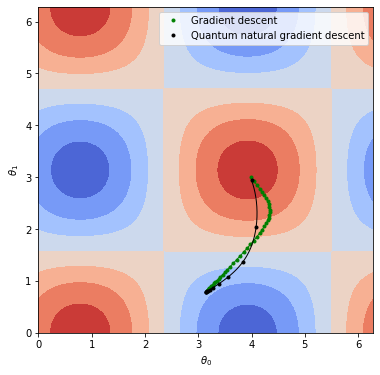

In [17]:
plot_params(gd_param_history=gd_param_history,
            qngd_param_history=qngd_param_history,
            plot_interval=10,
            figsize=[6,6],
            linewidth=1)

In [19]:
from visualization_function import plot_states

In [20]:
plot_states(gd_state_history=gd_state_history,
            qngd_state_history=qngd_state_history,
            plot_interval=10,
            figsize=[8,8],
            pointsize=50)

TypeError: plot_states() missing 2 required positional arguments: 'gd_color' and 'qngd_color'